In [3]:
news = pd.read_excel('news_kia.xlsx',index_col=0)
news.head()

,url,date,title,content,label
0,/item/news_read.nhn?article_id=0001825914&offi...,2021.04.23,EV6 英 사전예약 1000대 돌파...기아 첫 전용 전기차 ‘대박 예고’,유럽 사전예약 2만5000대 전망기아의 첫 전용 전기차 ‘EV6’(사진)가 영국에...,1
1,/item/news_read.nhn?article_id=0001825664&offi...,2021.04.23,"기아 EV6, 영국에서만 사전예약 1000대 돌파 ‘대박 조짐’",국내와 달리 100유로 보증금…취소 가능성 적어아이오니티 사용권·기아차지 1년 무...,1
2,/item/news_read.nhn?article_id=0000706195&offi...,2021.04.23,"삼성증권 ""기아, 올해 1분기 영업익 전망치 하회""",삼성증권은 23일 기아의 올해 1·4분기 실적이 시장 전망치(컨세서스)를 하회했다...,0
3,/item/news_read.nhn?article_id=0004626132&offi...,2021.04.23,"기아, 1·4분기 실적 컨센서스 하회-삼성",[파이낸셜뉴스] 삼성증권은 23일 기아의 올해 1·4분기 실적이 컨세서스를 하회했...,0
4,/item/news_read.nhn?article_id=0004909779&offi...,2021.04.23,"기아, 1Q 영업益 컨세서스 하회…4월 실적은 회복 근거-삼성",[이데일리 양희동 기자] 삼성증권은 23일 기아(000270)의 올해 1분기 실적...,0


In [4]:
def to_date(x):
    return arrow.get(x,'YYYY.MM.DD')

news.date = news.date.apply(to_date)

In [5]:
def find_week(x):
    return str(arrow.get(x).year)+'-'+str(arrow.get(x).week)
news['week'] = news.date.apply(find_week)

news['inc/dec']='0'
for i in range(len(news['week'])):
    if news['week'][i] in ['2021-16','2021-14','2021-12','2021-9','2021-8','2021-7',
                           '2021-6', '2021-4','2020-52','2020-51','2020-50','2020-47',
                           '2020-43','2020-42', '2020-39','2020-36','2020-34','2020-30',
                           '2020-28','2020-27','2020-25','2020-24','2020-20',
                           '2020-17','2020-16']:
        news['inc/dec'][i]='dec'
    else:
        news['inc/dec'][i]='inc'

In [6]:
def extract_n(text):
    kiwi = Kiwi()
    kiwi.prepare()
    morpheme = kiwi.analyze(text)
    for lemma, pos, _, _ in tqdm(morpheme[0][0]):
        if '@' in lemma:
            # 이메일제외
            pass
        elif pos.startswith('N'):
            # 특수문자 제거
            lemma = re.sub('[-=+,#/\?:^$.*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '',lemma)
            yield lemma

with open('cv.pkl', 'rb') as f:
    cv = pickle.load(f)
tdm = np.load('tdm.npy',allow_pickle=True).tolist()
tdm1 = np.load('tdm_tfidf.npy',allow_pickle=True).tolist()
df = pd.read_csv('news_kia_wordcounts.csv',index_col=0)
df_tfidf = pd.read_csv('news_kia_wordcounts_tfidf.csv',index_col=0)

with open('cv_f.pkl', 'rb') as f:
    cv_f = pickle.load(f)
tdm_f = np.load('tdm_f.npy',allow_pickle=True).tolist()
tdm_tfidf_f = np.load('tdm_tfidf_f.npy',allow_pickle=True).tolist()
df_f = pd.read_csv('news_kia_wordcounts_f.csv',index_col=0)
df_tfidf_f = pd.read_csv('news_kia_wordcounts_tfidf_f.csv',index_col=0)

with open('cv_s.pkl', 'rb') as f:
    cv_s = pickle.load(f)
tdm_s = np.load('tdm_s.npy',allow_pickle=True).tolist()
tdm_tfidf_s = np.load('tdm_tfidf_s.npy',allow_pickle=True).tolist()
df_s = pd.read_csv('news_kia_wordcounts_s.csv',index_col=0)
df_tfidf_s = pd.read_csv('news_kia_wordcounts_tfidf_s.csv',index_col=0)

with open('cv_inc.pkl', 'rb') as f:
    cv_inc = pickle.load(f)
tdm_inc = np.load('tdm_inc.npy',allow_pickle=True).tolist()
tdm_tfidf_inc = np.load('tdm_tfidf_inc.npy',allow_pickle=True).tolist()
df_inc = pd.read_csv('news_kia_wordcounts_inc.csv',index_col=0)
df_tfidf_inc = pd.read_csv('news_kia_wordcounts_tfidf_inc.csv',index_col=0)

with open('cv_dec.pkl', 'rb') as f:
    cv_dec = pickle.load(f)
tdm_dec = np.load('tdm_dec.npy',allow_pickle=True).tolist()
tdm_tfidf_dec = np.load('tdm_tfidf_dec.npy',allow_pickle=True).tolist()
df_dec = pd.read_csv('news_kia_wordcounts_dec.csv',index_col=0)
df_tfidf_dec = pd.read_csv('news_kia_wordcounts_tfidf_dec.csv',index_col=0)

In [29]:
temp_file = datapath("C:\\Users\\KwonYujin\\텍스트데이터분석\\자습\\LDA_kia")
model = LdaModel.load(temp_file)

# 텍스트데이터분석 중간 과제
## 빅데이터경영통계전공 20182791 권유진

In [1]:
# 전처리
import pandas as pd
import numpy as np
import re
from kiwipiepy import Kiwi
import arrow
# 시각화
import matplotlib.pylab as plt
import seaborn as sns
from wordcloud import WordCloud
# 웹스크래핑
import lxml.html
import requests
from selenium.webdriver import Chrome
from urllib.parse import urljoin
from cssselect import HTMLTranslator
from bs4 import BeautifulSoup
# 단어빈도분석
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# 감성분석
from tqdm import tqdm
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, LeaveOneOut
import tensorflow as tf
import tensorflow.keras.backend as K
# 주제분석
from sklearn.decomposition import TruncatedSVD
from gensim.matutils import Sparse2Corpus
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.test.utils import datapath
from gensim.models import CoherenceModel
# 기타
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')
import pickle

C:\Users\KwonYujin\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
%matplotlib inline
plt.rc('font',family='malgun gothic')
plt.rc('axes',unicode_minus=False)

## 데이터 수집

In [ ]:
# 웹스크래핑
url = 'https://finance.naver.com/item/news_news.nhn?code=000270&page={}&sm=title_entity_id.basic&clusterId='

news_list = list()
for i in range(1,275):
    res = requests.get(url.format(i))
    root = lxml.html.fromstring(res.text)
    links = root.cssselect('.tit')
    for link in links:
        res_link = requests.get(urljoin(url,link.attrib['href']))
        root_link = lxml.html.fromstring(res_link.text)
        date = root_link.cssselect('.p11')[0].text_content()
        content = re.sub(r'\s+', ' ' ,root_link.cssselect('#news_read')[0].text_content())
        for i in root_link.cssselect('.img_desc'):
            content = content.replace(i.text_content(),'')
        for j in root_link.cssselect('#news_read a'):
            content = content.replace(j.text_content(),'')
        for k in root_link.cssselect('#news_read h3'):
            content = content.replace(k.text_content(),'')
        news_list.append((link.attrib['href'], date, content))

news = pd.DataFrame(news_list, columns=['url', 'date', 'content'])
news.head()

## 전처리

In [ ]:
# 날짜 변환
def to_date(x):
    return arrow.get(x[1:11],'YYYY.MM.DD')

news.date = news.date.apply(to_date)

# 속보 처리
for i in range(news.shape[0]):
    if len(news.content[i]) <= 100:
        news.content[i] = news.title[i]

# 중복기사 제거
news = news.drop_duplicates('content', keep='last')

# index값 초기화
news = news.reset_index(drop=True)

# 무단 전재 및 재배포 금지 제거
for i in range(len(news.content)):
    news.content[i] = news.content[i][:-20] + re.sub("['무단','전재','및','배포','금지']",'',news.content[i][-20:])

# 형태소 분석 및 불필요기사내용 제거
def extranct_n(text):
    kiwi = Kiwi()
    Kiwi.prepare()
    morpheme = kiwi.analyze(text)
    for lemma, pos, _, _ in morpheme[0][0]:
        if '@' in lemma:
            # 이메일제외
            pass
        elif pos.startswith('N'):
            # 특수문자 제거
            lemma = re.sub('[-=+,#/\?:^$.*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '',lemma)
            yield lemma

## 단어빈도분석

In [ ]:
# 단어문서행렬 생성
cv = CountVectorizer(tokenizer=extract_n)
tdm = cv.fit_transform(news['content'])
df = pd.DataFrame({'단어':cv.get_feature_names(), '빈도':tdm.sum(axis=0).flat})

# tfidf변환
tfidf = TfidfTransformer()
tdm1 = tfidf.fit_transform(tdm)
df_tfidf = pd.DataFrame({'단어':cv.get_feature_names(), '빈도':tdm1.sum(axis=0).flat})
df_tfidf.head()

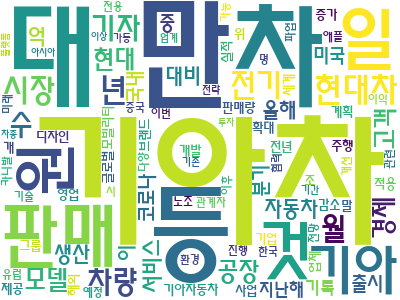

In [8]:
# 전체 기사 단어구름(CountVectorizer 버젼)
wc = WordCloud(font_path='C:\Windows\Fonts\HMFMMUEX',background_color='white', max_words=100, width=400, height=300)
count_dict = dict(zip(df.단어,df.빈도))
cloud = wc.fit_words(count_dict)
cloud.to_image()

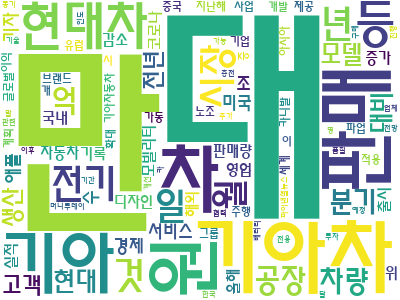

In [9]:
# 전체 기사 단어구름(Tfidf 버젼)
wc = WordCloud(font_path='C:\Windows\Fonts\HMFMMUEX',background_color='white', max_words=100, width=400, height=300)
count_dict = dict(zip(df_tfidf.단어,df_tfidf.빈도))
cloud = wc.fit_words(count_dict)
cloud.to_image()

In [ ]:
# 주가 상승/하락 주차 나누기
def find_week(x):
    return str(arrow.get(x).year)+'-'+str(arrow.get(x).week)
news['week'] = news.date.apply(find_week)

news['inc/dec']='0'
for i in range(len(news['week'])):
    if news['week'][i] in ['2021-16','2021-14','2021-12','2021-9','2021-8','2021-7',
                           '2021-6', '2021-4','2020-52','2020-51','2020-50','2020-47',
                           '2020-43','2020-42', '2020-39','2020-36','2020-34','2020-30',
                           '2020-28','2020-27','2020-25','2020-24','2020-20',
                           '2020-17','2020-16']:
        news['inc/dec'][i]='dec'
    else:
        news['inc/dec'][i]='inc'

news_dec = news.loc[news['inc/dec'] == 'dec',:]
news_inc = news.loc[news['inc/dec'] == 'inc',:]

In [ ]:
# 주가 감소 단어문서행렬
cv_dec = CountVectorizer(tokenizer=extract_n)
tdm_dec = cv_dec.fit_transform(news_dec['content'])
df_dec = pd.DataFrame({'단어':cv_dec.get_feature_names(),'빈도':tdm_dec.sum(axis=0).flat})
# 주가 상승 단어문서행렬
cv_inc = CountVectorizer(tokenizer=extract_n)
tdm_inc = cv_inc.fit_transform(news_inc['content'])
df_inc = pd.DataFrame({'단어':cv_inc.get_feature_names(),'빈도':tdm_inc.sum(axis=0).flat})

# 주가 상승 단어문서행렬(Tfidf)
tfidf_inc = TfidfTransformer()
tdm_tfidf_inc = tfidf_inc.fit_transform(tdm_inc)
df_tfidf_inc = pd.DataFrame({'단어':cv_inc.get_feature_names(),'빈도':tdm_tfidf_inc.sum(axis=0).flat})
# 주가 상승 단어문서행렬(Tfidf)
tfidf_dec = TfidfTransformer()
tdm_tfidf_dec = tfidf_dec.fit_transform(tdm_dec)
df_tfidf_dec = pd.DataFrame({'단어':cv_dec.get_feature_names(),'빈도':tdm_tfidf_dec.sum(axis=0).flat})

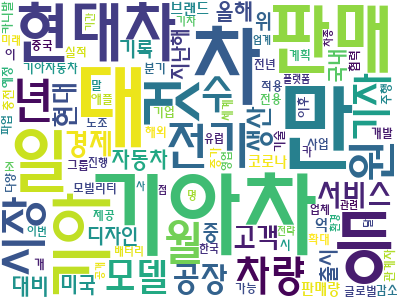

In [10]:
# 주가 상승 단어구름
wc = WordCloud(font_path='C:\Windows\Fonts\HMFMMUEX',background_color='white', max_words=100, width=400, height=300)
count_dict = dict(zip(df_inc['단어'],df_inc['빈도']))
cloud = wc.fit_words(count_dict)
cloud.to_image()

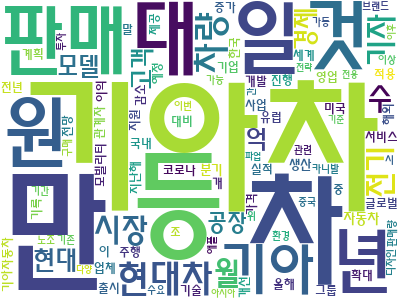

In [11]:
# 주가 하락 단어구름
wc = WordCloud(font_path='C:\Windows\Fonts\HMFMMUEX',background_color='white', max_words=100, width=400, height=300)
count_dict = dict(zip(df_dec['단어'],df_dec['빈도']))
cloud = wc.fit_words(count_dict)
cloud.to_image()

In [12]:
# 주가 상승/하락 빈도 차이 데이터프레임 만들기
df_sub = pd.merge(df_inc,df_dec,on='단어',how='outer')
df_sub['상-하'] = df_sub['빈도_x']-df_sub['빈도_y']
df_sub['하-상'] = df_sub['빈도_y']-df_sub['빈도_x']
df_sub.drop(['빈도_x','빈도_y'],axis=1, inplace=True)
df_sub.dropna(inplace=True)
df_sub.sort_values('상-하',ascending=False).head(10)

,단어,상-하,하-상
1510,대,2299.0,-2299.0
2156,만,1988.0,-1988.0
977,기아차,1425.0,-1425.0
6639,차,1109.0,-1109.0
7663,판매,1091.0,-1091.0
8257,현대차,1015.0,-1015.0
5928,전기,965.0,-965.0
3419,서비스,767.0,-767.0
1842,디자인,678.0,-678.0
5156,위,656.0,-656.0


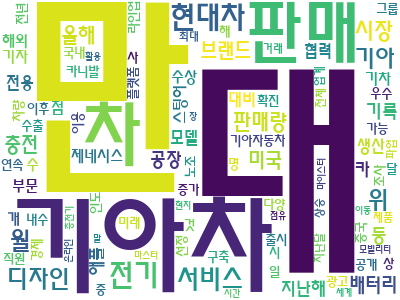

In [13]:
# 주가 상승/하락 빈도 차이
wc = WordCloud(font_path='C:\Windows\Fonts\HMFMMUEX',background_color='white', max_words=100, width=400, height=300)
count_dict = dict(zip(df_sub['단어'],df_sub['상-하']))
cloud = wc.fit_words(count_dict)
cloud.to_image()

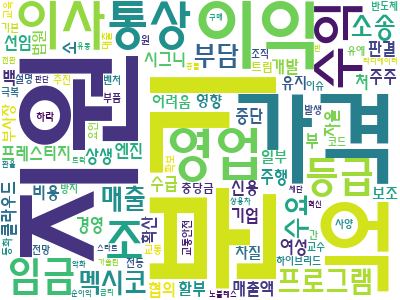

In [14]:
# 주가 하락/상승 빈도 차이
wc = WordCloud(font_path='C:\Windows\Fonts\HMFMMUEX',background_color='white', max_words=100, width=400, height=300)
count_dict = dict(zip(df_sub['단어'],df_sub['하-상']))
cloud = wc.fit_words(count_dict)
cloud.to_image()

## 감성분석

In [15]:
# 데이터 불균형 확인
print(news.label.value_counts())

1    2214
0     581
Name: label, dtype: int64


In [18]:
# F1Score 함수
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
# 참조: https://aakashgoel12.medium.com/how-to-add-user-defined-function-get-f1-score-in-keras-metrics-3013f979ce0d

# 감성분석
x = tdm1.A; y = news.label # 변수 지정
kfold = KFold(n_splits=10, shuffle=True) # 데이터 분할 방식 지정- Kfold
perf = []
model = tf.keras.models.Sequential() # 분석 시작
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[get_f1])
for train, test in kfold.split(x, y): # 최고의 성능까지 적합
    model.fit(x[train], y[train], epochs=100, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='get_f1')])
    scores = model.evaluate(x[test],y[test])
    perf.append((scores[0],scores[1]))
perf

Epoch 1/100
79/79 [==============================] - 1s 2ms/step - loss: 0.6597 - get_f1: 0.8462
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.5020 - get_f1: 0.8799
Epoch 1/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4763 - get_f1: 0.8843
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4504 - get_f1: 0.8694
Epoch 1/100
79/79 [==============================] - 0s 2ms/step - loss: 0.4093 - get_f1: 0.8900
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.4003 - get_f1: 0.8849
Epoch 1/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3694 - get_f1: 0.9104
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3570 - get_f1: 0.9008
Epoch 1/100
79/79 [==============================] - 0s 2ms/step - loss: 0.3400 - get_f1: 0.9144
Epoch 2/100
9/9 [==============================] - 0s 1ms/step - loss: 0.3204 - get_f1: 0.9269
Epoch 1/100
79/79 [=====================

[(0.5019763112068176, 0.8799107074737549),
 (0.4504103660583496, 0.8693540692329407),
 (0.40031111240386963, 0.8848590850830078),
 (0.3569808006286621, 0.9007744193077087),
 (0.32043251395225525, 0.9268662929534912),
 (0.2894388735294342, 0.9162158966064453),
 (0.2795673906803131, 0.9220015406608582),
 (0.2535775601863861, 0.9343758821487427),
 (0.2797878384590149, 0.9100449085235596),
 (0.23079364001750946, 0.9441033601760864)]

count    8445.000000
mean        0.183031
std         0.119922
min         0.000021
25%         0.099370
50%         0.149093
75%         0.236285
max         0.777075
Name: 가중치, dtype: float64
count    2783.000000
mean       -0.172099
std         0.118032
min        -0.997731
25%        -0.216497
50%        -0.152036
75%        -0.100935
max        -0.000122
Name: 가중치, dtype: float64


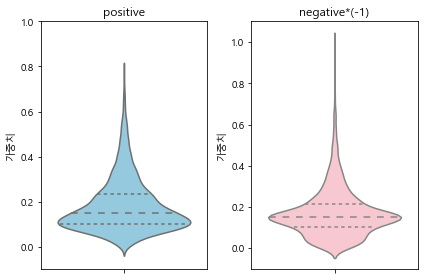

In [19]:
# 가중치 분석
w,b = model.weights
# 전체 기사 가중치 분석
word_sent = pd.DataFrame({'토큰':cv.get_feature_names(),'가중치':w.numpy().flat})
# 긍정기사 가중치 분석
word_sent_p = word_sent[word_sent.가중치>=0]
# 부정기사 가중치 분석
word_sent_n = word_sent[word_sent.가중치<0]
word_sent_np = word_sent_n.apply(lambda x: x*(-1)) # 가중치 절대값
# 긍정/부정 기사 가중치 통계량 확인
print(word_sent_p.가중치.describe())
print(word_sent_n.가중치.describe())
# 긍정/부정 기사 가중치 violinplot
fig, axes = plt.subplots(1,2)
sns.violinplot(data=word_sent_p,y='가중치', inner='quartile', color='skyblue', ax=axes[0])
axes[0].set_title('positive')
axes[0].set_ylim(-0.1,1)
sns.violinplot(data=word_sent_np,y='가중치', inner='quartile', color='pink', ax=axes[1])
axes[1].set_title('negative*(-1)')
plt.tight_layout()
plt.show()

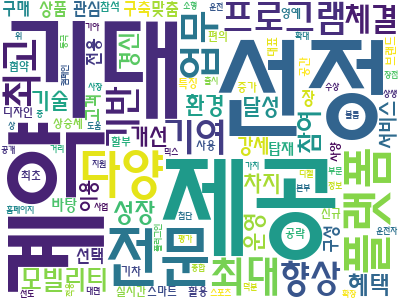

In [20]:
# 긍정 기사 단어구름
wc = WordCloud(font_path='C:\Windows\Fonts\HMFMMUEX',background_color='white', max_words=100, width=400, height=300)
count_dict = dict(zip(word_sent_p['토큰'],word_sent_p['가중치']))
cloud = wc.fit_words(count_dict)
cloud.to_image()

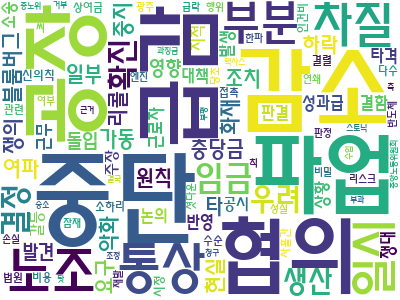

In [21]:
# 부정 기사 단어구름
wc = WordCloud(font_path='C:\Windows\Fonts\HMFMMUEX',background_color='white', max_words=100, width=400, height=300)
count_dict = dict(zip(word_sent_n['토큰'],word_sent_n.가중치.apply(lambda x: x*(-1))))
cloud = wc.fit_words(count_dict)
cloud.to_image()

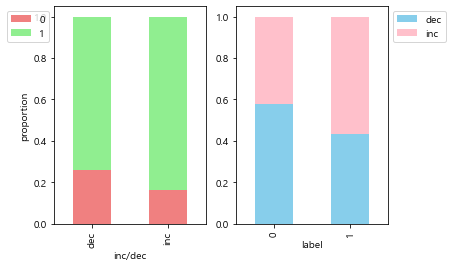

In [22]:
# 기사 감성&주가 변동 pivot_table
pv = pd.pivot_table(data=news, index='label', columns='inc/dec', values='content',aggfunc='count',margins=True)
pv = pv.divide(pv.loc['All'], axis=1).iloc[:-1,:-1] # 주가변동의 감성 비율
pv1 = pd.pivot_table(data=news, index='label', columns='inc/dec', values='content',aggfunc='count',margins=True)
pv1 = pv1.divide(pv1['All'], axis=0).iloc[:-1,:-1] # 감성의 주가변동 비율
# 시각화
fig, axes = plt.subplots(1,2)
pv.T.plot.bar(stacked=True, color=['lightcoral','lightgreen'], ax=axes[0])
axes[0].legend(bbox_to_anchor=(0,1))
axes[0].set_ylabel('proportion')
pv1.plot.bar(stacked=True, color=['skyblue','pink'],ax=axes[1])
axes[1].legend(bbox_to_anchor=(1,1))
plt.show()

In [23]:
# 카이제곱검정(독립성검정)
chi2_contingency(pd.crosstab(news.label,news['inc/dec']))

(40.33654382925258,
 2.137727280708424e-10,
 1,
 array([[ 268.56958855,  312.43041145],
        [1023.43041145, 1190.56958855]]))

100%|██████████████████████████████████████████████████████████████████████████| 11228/11228 [00:08<00:00, 1258.58it/s]


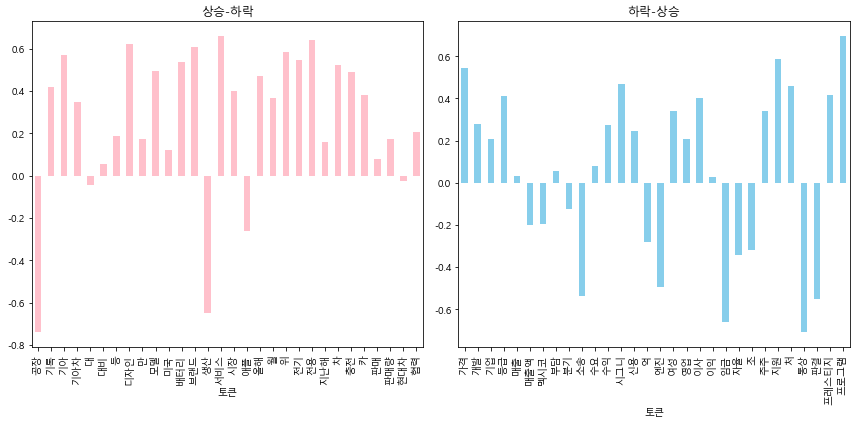

In [24]:
# 주가 변동 별 단어 가중치 시각화
fig, axes = plt.subplots(1,2,figsize=(12,6))
word_sent.loc[[word_sent.토큰[i] in list(df_sub.sort_values('상-하',ascending=False).head(30)['단어'])
               for i in tqdm(range(len(word_sent.토큰)))],:].set_index('토큰').plot.bar(ax=axes[0], color='pink',legend=False)
axes[0].set_title('상승-하락')
word_sent.loc[[word_sent.토큰[i] in list(df_sub.sort_values('하-상',ascending=False).head(30)['단어'])
               for i in tqdm(range(len(word_sent.토큰)))],:].set_index('토큰').plot.bar(ax=axes[1], color='skyblue',legend=False)
axes[1].set_title('하락-상승')
plt.tight_layout()
plt.show()

## 주제분석

In [ ]:
# 차원 축소
# 모델적합
svd = TruncatedSVD(n_components=200)
svd.fit(tdm1)
# 더미모델 생성
nrow, ncol = tdm1.shape
def resample(a):
    return np.random.choice(a, size=nrow)
d = np.apply_along_axis(resample, 0, tdm1.A)
svd2 = TruncatedSVD(n_components=200)
svd2.fit(d)
# 실제모델, 더미모델 성능 시각화
plt.plot(svd.singular_values_, label='svd1')
plt.plot(svd2.singular_values_, label='svd2')
plt.legend()
plt.show()
# 실제모델, 더미모델 교차지점 확인
print(np.argwhere(svd.singular_values_-svd2.singular_values_<=0))

In [27]:
# 전처리(gensim모델에 알맞게 형식변환)
corpus = Sparse2Corpus(tdm.T)
id2token = Dictionary([cv.get_feature_names()])

In [ ]:
# LDA 모델 적합
train_corpus, valid_corpus = train_test_split(corpus, test_size=0.1, random_state=0) # 데이터 분할
model = LdaModel(corpus=train_corpus, id2word=id2token, num_topics=185) 
# 모델 성능 증가시키기
loss = model.log_perplexity(valid_corpus)
old_loss = -np.inf
while loss > old_loss + 0.1:
    model.update(train_corpus)
    old_loss = loss
    loss = model.log_perplexity(valid_corpus)
    print(loss)

In [30]:
# 주제 응집도 계산
coh = CoherenceModel(model=model, corpus=corpus, texts=[cv.get_feature_names()], dictionary=id2token, coherence='c_v')
coh.get_coherence()

0.8043113855551057

In [31]:
# 주제 다양도 계산
topn = 25
top_words = set()
for topic in range(model.num_topics):
    for word, prob in model.show_topic(topic, topn=topn):
        top_words.add(word)
len(top_words)/(25*100)

0.6744

100%|██████████████████████████████████████████████████████████████████████████████| 2795/2795 [02:56<00:00, 15.84it/s]


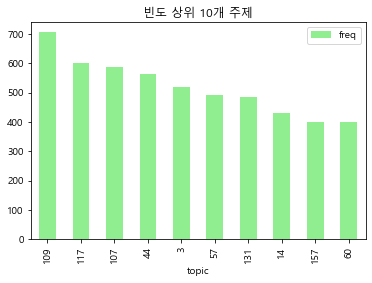

In [32]:
# 주제의 빈도 데이터프레임 만들기
topic_dist = pd.DataFrame(columns=['topic','freq'])
for i in tqdm(range(len(corpus))):
    for topic, freq in model.get_document_topics(corpus[i]):
        topic_dist = pd.concat((topic_dist, pd.DataFrame([(topic, freq*len(model.get_document_topics(corpus[i])))], columns=['topic','freq'])))
topic_dist = topic_dist.groupby('topic').sum()
# 빈도 상위 10개 주제 시각화
topic_dist.sort_values('freq',ascending=False).head(10).plot.bar(color='lightgreen')
plt.title('빈도 상위 10개 주제')
plt.show()

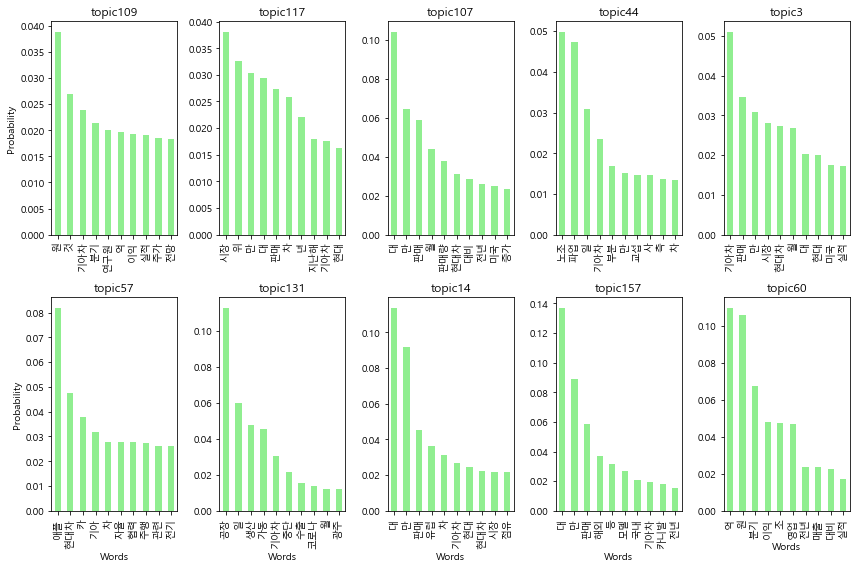

In [33]:
# 상위 10개 주제 주요 단어 확률 시각화
fig, axes = plt.subplots(2,5, figsize=(12,8))
pd.DataFrame(model.show_topic(109),columns=['word','prop']).set_index('word').plot.bar(color='lightgreen', ax=axes[0,0],legend=False,xlabel='',ylabel='Probability')
pd.DataFrame(model.show_topic(117),columns=['word','prop']).set_index('word').plot.bar(color='lightgreen', ax=axes[0,1],legend=False,xlabel='')
pd.DataFrame(model.show_topic(107),columns=['word','prop']).set_index('word').plot.bar(color='lightgreen', ax=axes[0,2],legend=False,xlabel='')
pd.DataFrame(model.show_topic(44),columns=['word','prop']).set_index('word').plot.bar(color='lightgreen', ax=axes[0,3],legend=False,xlabel='')
pd.DataFrame(model.show_topic(3),columns=['word','prop']).set_index('word').plot.bar(color='lightgreen', ax=axes[0,4],legend=False,xlabel='')
pd.DataFrame(model.show_topic(57),columns=['word','prop']).set_index('word').plot.bar(color='lightgreen', ax=axes[1,0],legend=False,xlabel='Words',ylabel='Probability')
pd.DataFrame(model.show_topic(131),columns=['word','prop']).set_index('word').plot.bar(color='lightgreen', ax=axes[1,1],legend=False,xlabel='Words')
pd.DataFrame(model.show_topic(14),columns=['word','prop']).set_index('word').plot.bar(color='lightgreen', ax=axes[1,2],legend=False,xlabel='Words')
pd.DataFrame(model.show_topic(157),columns=['word','prop']).set_index('word').plot.bar(color='lightgreen', ax=axes[1,3],legend=False,xlabel='Words')
pd.DataFrame(model.show_topic(60),columns=['word','prop']).set_index('word').plot.bar(color='lightgreen', ax=axes[1,4],legend=False,xlabel='Words')
axes[0,0].set_title('topic109')
axes[0,1].set_title('topic117')
axes[0,2].set_title('topic107')
axes[0,3].set_title('topic44')
axes[0,4].set_title('topic3')
axes[1,0].set_title('topic57')
axes[1,1].set_title('topic131')
axes[1,2].set_title('topic14')
axes[1,3].set_title('topic157')
axes[1,4].set_title('topic60')
plt.tight_layout()
plt.show()

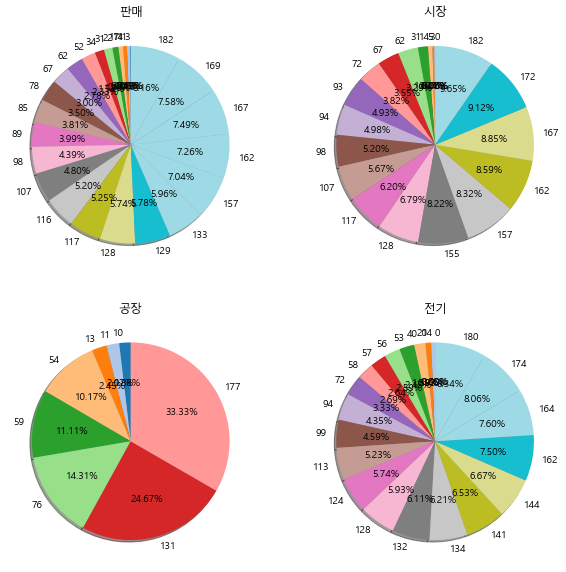

In [34]:
# 단어별 주제의 비율 시각화
sales = pd.DataFrame(model.get_term_topics(id2token.token2id['판매']),columns=['topic','prob_word'])
market = pd.DataFrame(model.get_term_topics(id2token.token2id['시장']),columns=['topic','prob_word'])
factory = pd.DataFrame(model.get_term_topics(id2token.token2id['공장']),columns=['topic','prob_word'])
electronic = pd.DataFrame(model.get_term_topics(id2token.token2id['전기']),columns=['topic','prob_word'])
fig, axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].pie(data=sales, x='topic', colors=plt.cm.get_cmap('tab20')(np.arange(len(sales.topic))),
              autopct='%.2f%%', startangle=90, labels=sales.topic,shadow=True)
axes[0,1].pie(data=market, x='topic', colors=plt.cm.get_cmap('tab20')(np.arange(len(sales.topic))),
              autopct='%.2f%%', startangle=90, labels=market.topic,shadow=True)
axes[1,0].pie(data=factory, x='topic', colors=plt.cm.get_cmap('tab20')(np.arange(len(sales.topic))),
              autopct='%.2f%%', startangle=90, labels=factory.topic,shadow=True)
axes[1,1].pie(data=electronic, x='topic', colors=plt.cm.get_cmap('tab20')(np.arange(len(sales.topic))),
              autopct='%.2f%%', startangle=90, labels=electronic.topic,shadow=True)
axes[0,0].set_title('판매')
axes[0,1].set_title('시장')
axes[1,0].set_title('공장')
axes[1,1].set_title('전기')
plt.tight_layout
plt.show()

100%|█████████████████████████████████████████████████████████████████████████████| 2795/2795 [00:14<00:00, 189.08it/s]


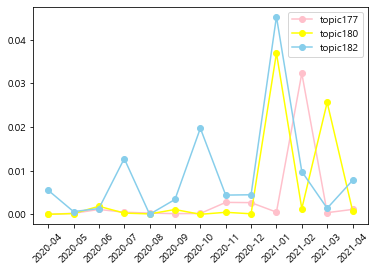

In [35]:
# 날짜별 주제 빈도
# 데이터프레임 만들기
topic_in_doc182 = []
for x in tqdm(model.get_document_topics(corpus)):
    for i in range(len(x)):
        finding = []
        if x[i][0]==182:
            finding.append(x[i][1])
        else:
            finding.append(0)
    topic_in_doc182.append(max(finding))
year_topic_182 = pd.DataFrame({'date':news.date.apply(lambda x: x.format('YYYY-MM')),'prob':topic_in_doc182})
year_topic_182 = year_topic_182.groupby('date').agg('mean')

topic_in_doc177 = []
for x in tqdm(model.get_document_topics(corpus)):
    for i in range(len(x)):
        finding = []
        if x[i][0]==177:
            finding.append(x[i][1])
        else:
            finding.append(0)
    topic_in_doc177.append(max(finding))
year_topic_177 = pd.DataFrame({'date':news.date.apply(lambda x: x.format('YYYY-MM')),'prob':topic_in_doc177})
year_topic_177 = year_topic_177.groupby('date').agg('mean')

topic_in_doc180 = []
for x in tqdm(model.get_document_topics(corpus)):
    for i in range(len(x)):
        finding = []
        if x[i][0]==180:
            finding.append(x[i][1])
        else:
            finding.append(0)
    topic_in_doc180.append(max(finding))
year_topic_180 = pd.DataFrame({'date':news.date.apply(lambda x: x.format('YYYY-MM')),'prob':topic_in_doc180})
year_topic_180 = year_topic_180.groupby('date').agg('mean')
# 시각화
plt.plot(year_topic_177.index, year_topic_177.prob, c='pink', marker='o',label='topic177')
plt.plot(year_topic_180.index, year_topic_180.prob, c='yellow', marker='o',label='topic180')
plt.plot(year_topic_182.index, year_topic_182.prob, c='skyblue', marker='o',label='topic182')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [36]:
# 긍정 기사 추출&단어문서행렬 만들기
news_p = news[news.label==1]
cv_p = CountVectorizer(tokenizer=extract_n)
tdm_p = cv_p.fit_transform(news_p.content)
df_p = pd.DataFrame({'word':cv_p.get_feature_names(),'freq':tdm_p.sum(axis=0).flat})
# 부정 기사 추출&단어문서행렬 만들기
news_n = news[news.label==0]
cv_n = CountVectorizer(tokenizer=extract_n)
tdm_n = cv_n.fit_transform(news_n.content)
df_n = pd.DataFrame({'word':cv_n.get_feature_names(),'freq':tdm_n.sum(axis=0).flat})

100%|████████████████████████████████████████████████████████████████████████████| 898/898 [00:00<00:00, 898065.09it/s]


100%|████████████████████████████████████████████████████████████████████████████| 335/335 [00:00<00:00, 321973.38it/s]


100%|████████████████████████████████████████████████████████████████████████████| 576/576 [00:00<00:00, 577556.56it/s]


100%|████████████████████████████████████████████████████████████████████████████| 398/398 [00:00<00:00, 397839.13it/s]


100%|████████████████████████████████████████████████████████████████████████████| 340/340 [00:00<00:00, 338973.94it/s]


100%|████████████████████████████████████████████████████████████████████████████| 675/675 [00:00<00:00, 695957.52it/s]


100%|████████████████████████████████████████████████████████████████████████████| 878/878 [00:00<00:00, 828108.59it/s]


100%|████████████████████████████████████████████████████████████████████████████| 247/247 [00:00<00:00, 246137.58it/s]


100%|████████████████████████████████████████████████████████████████████████████| 616/616 [00:00<00:00, 615604.30it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 94/94 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 319/319 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████| 833/833 [00:00<00:00, 776067.35it/s]


100%|████████████████████████████████████████████████████████████████████████████| 403/403 [00:00<00:00, 402933.14it/s]


100%|████████████████████████████████████████████████████████████████████████████| 561/561 [00:00<00:00, 561442.27it/s]


100%|████████████████████████████████████████████████████████████████████████████| 498/498 [00:00<00:00, 500662.37it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 294/294 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 728/728 [00:00<?, ?it/s]


100%|████████████████████████████████████████████████████████████████████████████| 478/478 [00:00<00:00, 459412.77it/s]


100%|████████████████████████████████████████████████████████████████████████████| 335/335 [00:00<00:00, 335104.18it/s]


100%|████████████████████████████████████████████████████████████████████████████████████████| 509/509 [00:00<?, ?it/s]


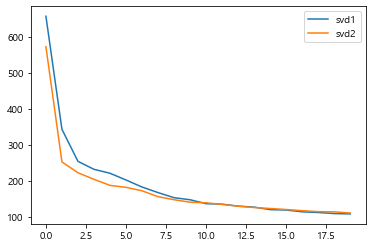

[[10]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]


In [37]:
# 긍정기사 차원축소
# 더미모델
svd = TruncatedSVD(n_components=20)
svd.fit(tdm_p)
nrow, ncol = tdm_p.shape
def resample(a):
    return np.random.choice(a, size=nrow)
d = np.apply_along_axis(resample, 0, tdm_p.A)
d.shape
# 실제모델
svd2 = TruncatedSVD(n_components=20)
svd2.fit(d)
# 모델 성능 시각화
plt.plot(svd.singular_values_, label='svd1')
plt.plot(svd2.singular_values_, label='svd2')
plt.legend()
plt.show()
# 모델 성능 교차 지점 찾기
print(np.argwhere(svd.singular_values_-svd2.singular_values_<=0))

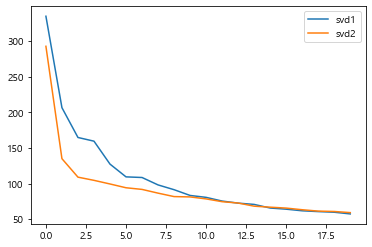

[[12]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]


In [38]:
# 부정기사 차원축소
# 더미모델
svd = TruncatedSVD(n_components=20)
svd.fit(tdm_n)
nrow, ncol = tdm_n.shape
def resample(a):
    return np.random.choice(a, size=nrow)
d = np.apply_along_axis(resample, 0, tdm_n.A)
d.shape
# 실제모델
svd2 = TruncatedSVD(n_components=20)
svd2.fit(d)
# 시각화
plt.plot(svd.singular_values_, label='svd1')
plt.plot(svd2.singular_values_, label='svd2')
plt.legend()
plt.show()
# 모델 성능 교차 지점 찾기
print(np.argwhere(svd.singular_values_-svd2.singular_values_<=0))

In [39]:
# 긍정기사 전처리
corpus_p = Sparse2Corpus(tdm_p.T)
id2token_p = Dictionary([cv_p.get_feature_names()])
# 부정기사 전처리
corpus_n = Sparse2Corpus(tdm_n.T)
id2token_n = Dictionary([cv_n.get_feature_names()])

In [40]:
# 긍정기사 모델링-LDA
train_corpus_p, valid_corpus_p = train_test_split(corpus_p, test_size=0.1, random_state=0)
model_p = LdaModel(corpus=train_corpus_p, id2word=id2token_p, num_topics=14)
loss = model.log_perplexity(valid_corpus_p)
old_loss = -np.inf
while loss > old_loss + 0.1:
    model_p.update(train_corpus_p)
    old_loss = loss
    loss = model_p.log_perplexity(valid_corpus_p)
    print(loss)

-9.821878415680054
-9.71321747230195
-9.669787263022712


In [41]:
# 부정기사 모델링-LDA
train_corpus_n, valid_corpus_n = train_test_split(corpus_n, test_size=0.1, random_state=0)
model_n = LdaModel(corpus=train_corpus_n, id2word=id2token_n, num_topics=11)
loss = model.log_perplexity(valid_corpus_n)
old_loss = -np.inf
while loss > old_loss + 0.1:
    model_n.update(train_corpus_n)
    old_loss = loss
    loss = model_n.log_perplexity(valid_corpus_n)
    print(loss)

-9.79418121411638
-9.77667558711758


100%|███████████████████████████████████████████████████████████████████████████████| 581/581 [00:03<00:00, 168.69it/s]


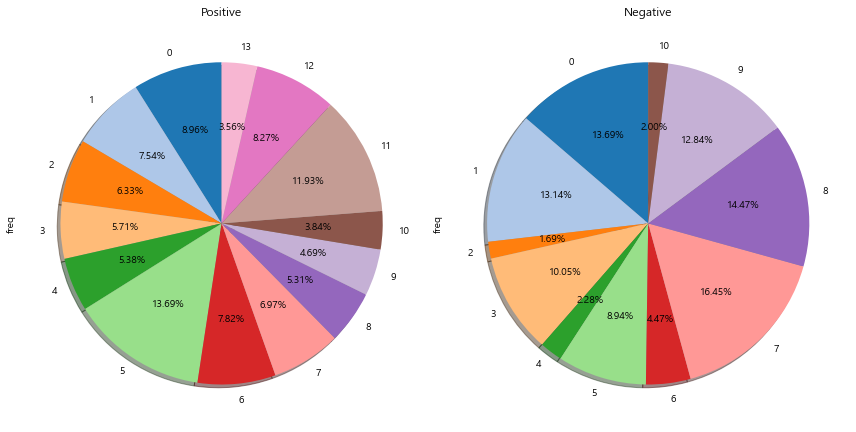

In [42]:
# 긍정기사 주제비율
topic_dist_p = pd.DataFrame(columns=['topic','freq'])
for i in tqdm(range(len(corpus_p))):
    for topic, freq in model_p.get_document_topics(corpus_p[i]):
        topic_dist_p = pd.concat((topic_dist_p, pd.DataFrame([(topic, freq*len(model_p.get_document_topics(corpus_p[i])))], columns=['topic','freq'])))
topic_dist_p = topic_dist_p.groupby('topic').sum()
# 부정기사 주제비율
topic_dist_n = pd.DataFrame(columns=['topic','freq'])
for i in tqdm(range(len(corpus_n))):
    for topic, freq in model_n.get_document_topics(corpus_n[i]):
        topic_dist_n = pd.concat((topic_dist_n, pd.DataFrame([(topic, freq*len(model_n.get_document_topics(corpus_n[i])))], columns=['topic','freq'])))
topic_dist_n = topic_dist_n.groupby('topic').sum()
# 긍정/부정기사 주제비율 시각화
fig, axes = plt.subplots(1,2, figsize=(12,8))
topic_dist_p.plot.pie(y='freq',autopct='%.2f%%', ax=axes[0], legend=False,
                     colors = plt.cm.get_cmap('tab20')(np.arange(len(sales.topic))),
                    startangle=90, shadow=True)
topic_dist_n.plot.pie(y='freq',autopct='%.2f%%', ax=axes[1], legend=False,
                     colors = plt.cm.get_cmap('tab20')(np.arange(len(sales.topic))),
                    startangle=90, shadow=True)
axes[0].set_title('Positive')
axes[1].set_title('Negative')
plt.tight_layout()
plt.show()

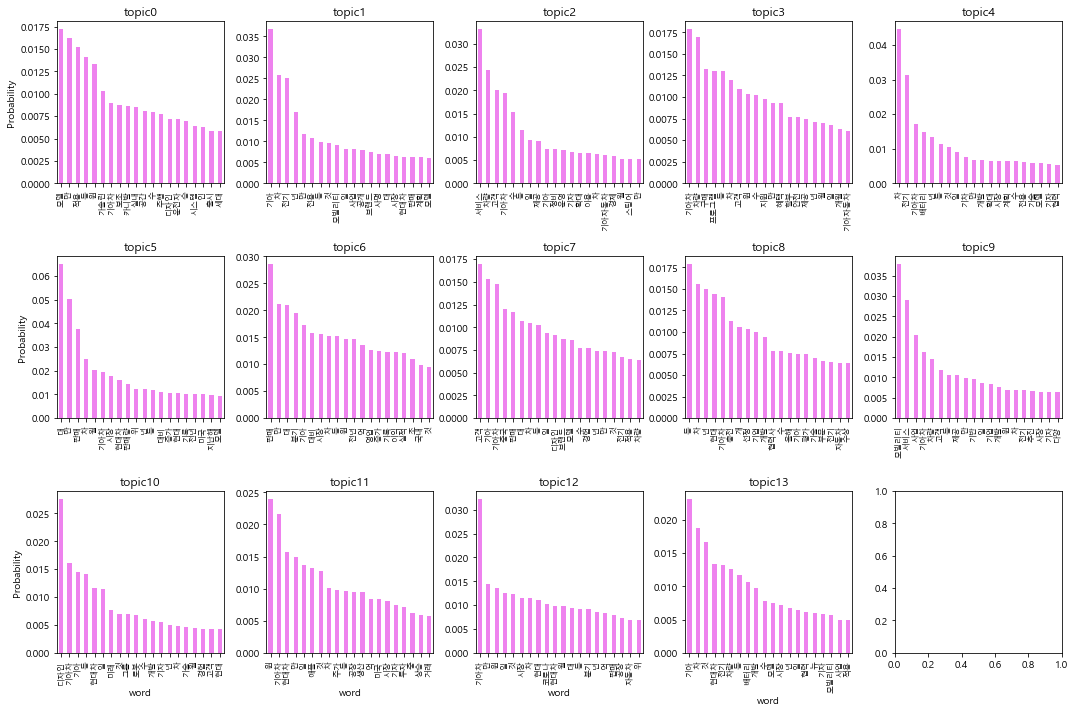

In [43]:
# 긍정기사 주제, 단어확률 시각화
fig, axes = plt.subplots(3,5, figsize=(15,10))
for i in range(5):
    p1 = pd.DataFrame(model_p.show_topic(i,topn=20), columns=['word','prob']).set_index('word')
    p1.plot.bar(color='violet', ax=axes[0,i], legend=False)
    axes[0,i].set_xlabel('')
    axes[0,i].set_title('topic{}'.format(i))
    axes[0,i].set_xticklabels(p1.index, fontsize = 8)
for i in range(5,10):
    p2 = pd.DataFrame(model_p.show_topic(i,topn=20), columns=['word','prob']).set_index('word')
    p2.plot.bar(color='violet', ax=axes[1,i-5], legend=False)
    axes[1,i-5].set_title('topic{}'.format(i))
    axes[1,i-5].set_xlabel('')
    axes[1,i-5].set_xticklabels(p2.index, fontsize = 8)
for i in range(10,14):
    p3 = pd.DataFrame(model_p.show_topic(i,topn=20), columns=['word','prob']).set_index('word')
    p3.plot.bar(color='violet', ax=axes[2,i-10], legend=False)
    axes[2,i-10].set_title('topic{}'.format(i))
    axes[2,i-10].set_xticklabels(p3.index, fontsize = 8)
axes[0,0].set_ylabel('Probability')
axes[1,0].set_ylabel('Probability')
axes[2,0].set_ylabel('Probability')
plt.tight_layout()

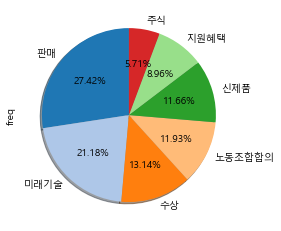

In [46]:
# 긍정 기사 비슷한 주제 합치기
# 열 생성
topic_dist_p['topic_name'] = np.nan
# 주제 병합
topic_dist_p['topic_name'].iloc[[1,4,12]] = '미래기술'
topic_dist_p['topic_name'].iloc[[2,5,10,13]] = '판매'
topic_dist_p['topic_name'].iloc[[6,8]] = '수상'
topic_dist_p['topic_name'].iloc[[7,9]] = '신제품'
topic_dist_p['topic_name'].iloc[11] = '노동조합합의'
topic_dist_p['topic_name'].iloc[3] = '주식'
topic_dist_p['topic_name'].iloc[0] = '지원혜택'
topic_dist_p2 = topic_dist_p.groupby('topic_name').sum().sort_values('freq', ascending=False)
# 시각화
topic_dist_p2.plot.pie(y='freq',autopct='%.2f%%', legend=False,
                     colors = plt.cm.get_cmap('tab20')(np.arange(len(topic_dist_n.freq))),
                    startangle=90, shadow=True)
plt.show()

100%|███████████████████████████████████████████████████████████████████████████████| 581/581 [00:00<00:00, 853.31it/s]


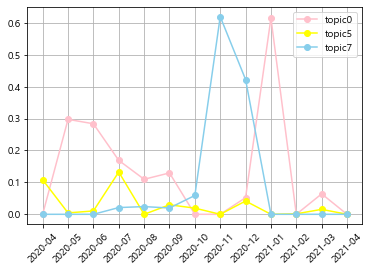

In [47]:
# 날짜별 부정기사 주제 빈도(0,5,7)
# 날짜별 부정기사 주제빈도 데이터프레임 만들기
topicn_in_doc0 = []
for x in tqdm(model_n.get_document_topics(corpus_n)):
    for i in range(len(x)):
        finding = []
        if x[i][0]==0:
            finding.append(x[i][1])
        else:
            finding.append(0)
    topicn_in_doc0.append(max(finding))
year_topicn_0 = pd.DataFrame({'date':news_n.date.apply(lambda x: x.format('YYYY-MM')),'prob':topicn_in_doc0})
year_topicn_0 = year_topicn_0.groupby('date').agg('mean')

topicn_in_doc5 = []
for x in tqdm(model_n.get_document_topics(corpus_n)):
    for i in range(len(x)):
        finding = []
        if x[i][0]==5:
            finding.append(x[i][1])
        else:
            finding.append(0)
    topicn_in_doc5.append(max(finding))
year_topicn_5 = pd.DataFrame({'date':news_n.date.apply(lambda x: x.format('YYYY-MM')),'prob':topicn_in_doc5})
year_topicn_5 = year_topicn_5.groupby('date').agg('mean')

topicn_in_doc7 = []
for x in tqdm(model_n.get_document_topics(corpus_n)):
    for i in range(len(x)):
        finding = []
        if x[i][0]==7:
            finding.append(x[i][1])
        else:
            finding.append(0)
    topicn_in_doc7.append(max(finding))
year_topicn_7 = pd.DataFrame({'date':news_n.date.apply(lambda x: x.format('YYYY-MM')),'prob':topicn_in_doc7})
year_topicn_7 = year_topicn_7.groupby('date').agg('mean')
# 시각화
plt.plot(year_topicn_0.index, year_topicn_0.prob, c='pink', marker='o',label='topic0')
plt.plot(year_topicn_5.index, year_topicn_5.prob, c='yellow', marker='o',label='topic5')
plt.plot(year_topicn_7.index, year_topicn_7.prob, c='skyblue', marker='o',label='topic7')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

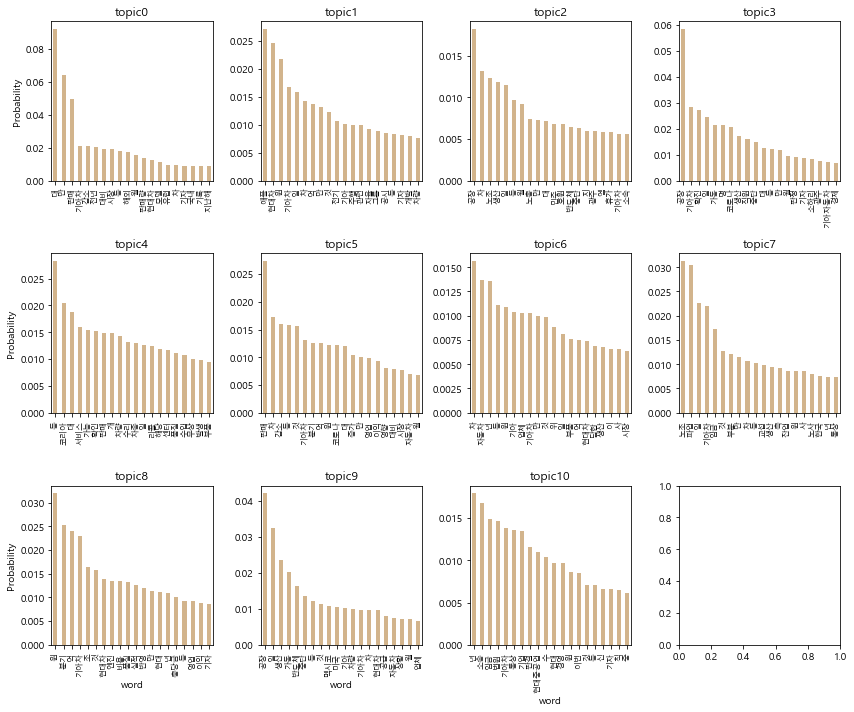

In [48]:
# 부정기사 주제, 단어 확률 시각화
fig, axes = plt.subplots(3,4, figsize=(12,10))
for i in range(4):
    n1 = pd.DataFrame(model_n.show_topic(i,topn=20), columns=['word','prob']).set_index('word')
    n1.plot.bar(color='tan', ax=axes[0,i], legend=False)
    axes[0,i].set_xlabel('')
    axes[0,i].set_title('topic{}'.format(i))
    axes[0,i].set_xticklabels(n1.index, fontsize = 8)
for i in range(4,8):
    n2 = pd.DataFrame(model_n.show_topic(i,topn=20), columns=['word','prob']).set_index('word')
    n2.plot.bar(color='tan', ax=axes[1,i-4], legend=False)
    axes[1,i-4].set_title('topic{}'.format(i))
    axes[1,i-4].set_xlabel('')
    axes[1,i-4].set_xticklabels(n2.index, fontsize = 8)
for i in range(8,11):
    n3 = pd.DataFrame(model_n.show_topic(i,topn=20), columns=['word','prob']).set_index('word')
    n3.plot.bar(color='tan', ax=axes[2,i-8], legend=False)
    axes[2,i-8].set_title('topic{}'.format(i))
    axes[2,i-8].set_xticklabels(n3.index, fontsize = 8)
axes[0,0].set_ylabel('Probability')
axes[1,0].set_ylabel('Probability')
axes[2,0].set_ylabel('Probability')
plt.tight_layout()
plt.show()

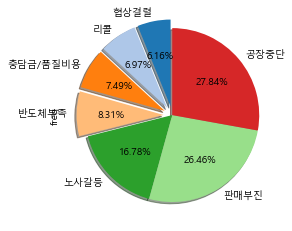

In [49]:
# 부정 기사 비슷한 주제 합치기
# 열 생성
topic_dist_p['topic_name'] = np.nan
# 주제 병합
topic_dist_p['topic_name'].iloc[[0,10]] = '노사갈등'
topic_dist_p['topic_name'].iloc[[1,5]] = '공장중단'
topic_dist_p['topic_name'].iloc[[4,6,7]] = '판매부진'
topic_dist_p['topic_name'].iloc[2] = '반도체부족'
topic_dist_p['topic_name'].iloc[3] = '충담금/품질비용'
topic_dist_p['topic_name'].iloc[8] = '리콜'
topic_dist_p['topic_name'].iloc[9] = '협상결렬'
topic_dist_p2 = topic_dist_p.groupby('topic_name').sum().sort_values('freq')
# 시각화
topic_dist_p2.plot.pie(y='freq',autopct='%.2f%%', legend=False,
                     colors = plt.cm.get_cmap('tab20')(np.arange(len(topic_dist_p.freq))),
                    startangle=90, shadow=True, explode=[0.1,0.1,0.1,0.1,0,0,0])
plt.show()